In [15]:
import os
import swifter
import json
import csv
import rootpath

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rpy2.robjects as ro
from rpy2.robjects.packages import importr

from topics import topics as topic_dict

%matplotlib inline
wbs = importr("wbs")

In [2]:
root_dir = rootpath.detect()
topic_dir = os.path.join(root_dir, "data", "cpd_aspects")

In [3]:
filename = "1#17534235-5843-4712-a672-fdc56268cb2e"

In [32]:
df = pd.read_csv(os.path.join(topic_dir, filename))

In [33]:
topics = list(topic_dict.keys())

In [34]:
topics

['room',
 'restaurant',
 'facility',
 'pool',
 'family',
 'price',
 'atmosphere',
 'fitness',
 'transport',
 'beach',
 'entertainment',
 'venue',
 'parking',
 'reception',
 'renovation']

In [39]:
reno_df = df[df['renovation']==True]

In [41]:
reno_df = reno_df.sort_values('date')
cpd_df = reno_df.groupby(['date', 'uid'])['sentiment'].mean().reset_index()
cpd_df = cpd_df.groupby('date')['sentiment'].mean().reset_index()

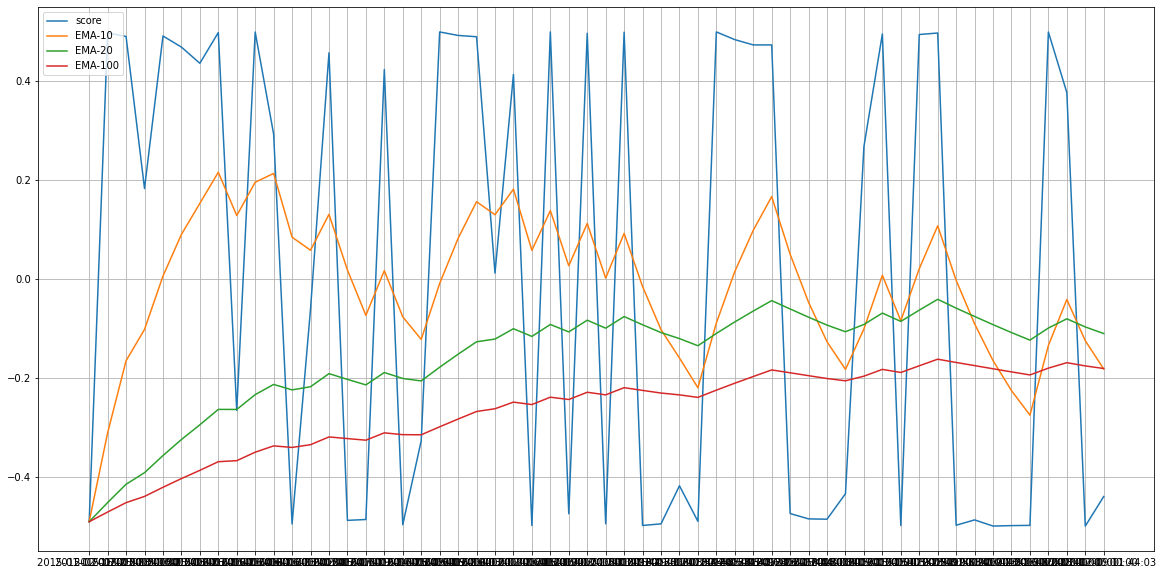

In [42]:
cpd_df.set_index('date', inplace=True)
cpd_df['EMA_100'] = cpd_df['sentiment'].ewm(span=100, adjust=False).mean()
cpd_df['EMA_50'] = cpd_df['sentiment'].ewm(span=50, adjust=False).mean()
cpd_df['EMA_10'] = cpd_df['sentiment'].ewm(span=10, adjust=False).mean()
plt.figure(figsize=[20, 10])
plt.grid(True)
plt.plot(cpd_df['sentiment'], label='score')
plt.plot(cpd_df['EMA_10'], label='EMA-10')
plt.plot(cpd_df['EMA_50'], label='EMA-20')
plt.plot(cpd_df['EMA_100'], label='EMA-100')
plt.legend(loc=2)
plt.show()

In [38]:
cpd_df

,sentiment,EMA_100,EMA_50,EMA_10
date,,,,
2015-01-02 00:00:00,0.000521,0.000521,0.000521,0.000521
2015-01-05 00:00:00,0.499386,0.010400,0.020085,0.091224
2015-07-16 00:00:00,-0.005928,0.010076,0.019064,0.073560
2015-07-27 00:00:00,0.499943,0.019777,0.037922,0.151084
2015-08-09 00:00:00,0.365001,0.026613,0.050749,0.189978
...,...,...,...,...
2020-03-14 00:00:00,0.497629,0.243804,0.233673,0.349972
2020-03-15 18:19:49,0.491721,0.248714,0.243793,0.375745
2020-03-16 00:00:00,0.496576,0.253622,0.253706,0.397714
